In [1]:
import numpy as np

### numpy创建数组

In [3]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
np.empty((2,2,3))

array([[[6.23042070e-307, 1.42417221e-306, 1.60219306e-306],
        [1.33511290e-306, 2.22522597e-306, 1.33511969e-306]],

       [[8.01097889e-307, 1.78020169e-306, 7.56601165e-307],
        [1.02359984e-306, 1.15710088e-306, 2.22812796e-312]]])

In [29]:
arr = np.arange(9)
arr = arr.reshape(3,3)
print(arr)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### 矢量化
数组通常不用在编写循环的情况下就可以进行批量计算

In [8]:
arr1 = np.array([1,2,3,4])
arr2 = np.array([2,4,6,8])
arr1 + arr2

array([ 3,  6,  9, 12])

In [11]:
arr1 = np.array([[1,2,3,4],[1,2,3,4]])
arr2 = np.array([[2,4,6,8],[3,5,7,9]])
print(arr1 + arr2)
print(arr1 * arr2)

[[ 3  6  9 12]
 [ 4  7 10 13]]
[[ 2  8 18 32]
 [ 3 10 21 36]]


In [13]:
5 * arr1

array([[ 5, 10, 15, 20],
       [ 5, 10, 15, 20]])

### numpy数组的索引和切片

In [16]:
arr = np.arange(10)
print(arr)
print(arr[2])
print(arr[0:4])

arr[0: 4] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
2
[0 1 2 3]
[12 12 12 12  4  5  6  7  8  9]


### numpy条件逻辑判断
np.where 等同于 x if condition else y 矢量化的一个版本, x if c else y 表示的意思是当条件condition成立时，表达式返回值为x，不成立时返回值是y，np.where的写法，一般用于根据一个数组产生一个新的数组，跟python中函数式变成map，reduce等函数类似。

In [11]:
arr_1 = np.array([1, 2, 3])
arr_2 = np.array([4, 5, 6])
condition = np.array([True, False, True])
# zip 接收的参数是可迭代的对象
# zip()函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，
# 然后返回由这些元组组成的列表
z = zip(arr_1, arr_2, condition)
for item in z:
    print(item)
    
arr = [(x if c else y) for x, y, c in zip(arr_1, arr_2, condition)]
print(arr)

arr = np.where(condition, arr_1, arr_2)
print(arr)

(1, 4, True)
(2, 5, False)
(3, 6, True)
[1, 5, 3]
[1 5 3]


In [14]:
arr = np.random.randn(4, 4)
print(arr)

arr_1 = np.where(arr>0, 1, -1)
print(arr_1)

arr_2 = np.where(arr>0, 1, arr)
print(arr_2)

[[-0.94405187 -0.6836025  -0.09005405 -0.83922389]
 [ 0.35047793 -0.90950411 -0.94310153 -0.50471442]
 [-0.13608111 -0.64739395 -1.17531833  0.324704  ]
 [-0.9262828  -0.45401898 -1.25176641 -0.08045698]]
[[-1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [-1 -1 -1  1]
 [-1 -1 -1 -1]]
[[-0.94405187 -0.6836025  -0.09005405 -0.83922389]
 [ 1.         -0.90950411 -0.94310153 -0.50471442]
 [-0.13608111 -0.64739395 -1.17531833  1.        ]
 [-0.9262828  -0.45401898 -1.25176641 -0.08045698]]


### numpy的数学运算
常用函数 sum mean std


In [26]:
arr = np.arange(1, 17)
arr = arr.reshape(4, 4)
print(arr)
print(arr.mean())
print(np.mean(arr))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
8.5
8.5


In [31]:
print(np.sum(arr))

36


In [32]:
print(arr.std())  # 标准差计算

2.581988897471611


### numpy文件处理
numpy可以读写磁盘上的文本数据或者是二进制数据，主要应用的函数就是np.save()和np.load()，默认情况下数据是以未压缩的原始二进制格式保存在拓展名为.npy的文件中。

In [2]:
arr = np.arange(10)
print(arr)
np.save('arr_array', arr)  # 保存数据

[0 1 2 3 4 5 6 7 8 9]


In [5]:
arr1 = np.load('arr_array.npy')   # 加载数据
print(arr1)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
np.savez('any_array_1', a = arr)  # 保存成一个压缩文件，数组以关键字参数的形式传入
np.load('any_array_1.npz')['a']  # 使用关键字取出，关键字自己设定

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.savetxt('any_array_2', arr, delimiter=',')  # 保存成一个文本文件，分隔符指定为，
np.loadtxt('any_array_2', delimiter=',')

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## 线性代数
dot  矩阵的乘法运算  
trace 计算对角线元素的和  
det  计算矩阵的行列式  
eig  计算方针的本征值和本征下岗了  
inv  计算方针的逆  

In [20]:
x = np.array([[2,3,3],[4,6,6]])
y = np.array([[1,2],[3,4],[5,6]])
print(x.dot(y))
print(np.matmul(x, y))   # 另一种写法

[[26 34]
 [52 68]]
[[26 34]
 [52 68]]


In [16]:
np.trace(x)

8

In [21]:
z = np.array([[12,34],[23,34]])
np.linalg.det(z)  # 计算矩阵行列式

-373.9999999999998

### 随机漫步的例子

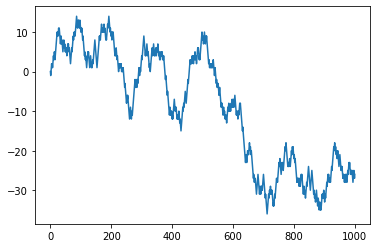

[False False False ...  True  True  True]


In [29]:
import matplotlib.pyplot as plt

# 求什么时候第一次距离起始点10步远
position = 0   # 初始化一个位置的值
walk = [position]  # 步值初始化
steps = 1000

for i in range(steps):
    step = 1 if np.random.randint(0, 2) else -1
    position += step
    walk.append(position)
    
plt.plot(walk)
plt.show()
print((np.abs(walk)>10).argmax())
